In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

# 1.Data Collection

In [2]:
delivery = pd.read_csv('delivery_time.csv')
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# 2. Data Understanding

In [3]:
delivery.shape

(21, 2)

In [5]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
delivery.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<AxesSubplot:ylabel='Delivery Time'>

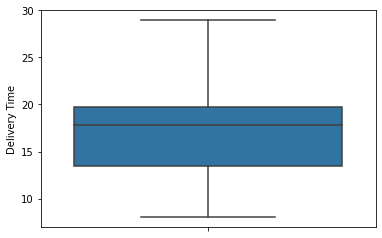

In [77]:
sns.boxplot(y = y ,data= delivery)# no outliers

# 2.1 Assumption Check

 ### Test For Linearity 

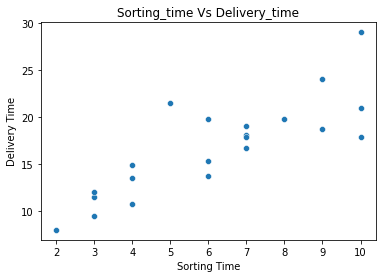

In [12]:
sns.scatterplot(x ='Sorting Time',y = 'Delivery Time', data= delivery)
plt.title('Sorting_time Vs Delivery_time')
plt.show()

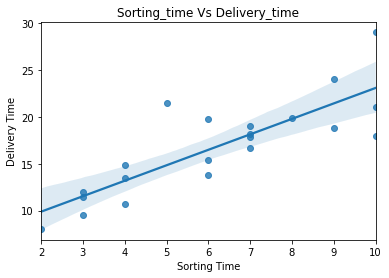

In [13]:
sns.regplot(x ='Sorting Time',y = 'Delivery Time', data= delivery)
plt.title('Sorting_time Vs Delivery_time')
plt.show()

### Test For Normality

In [15]:
srt_time = delivery['Sorting Time']
dly_time = delivery['Delivery Time']

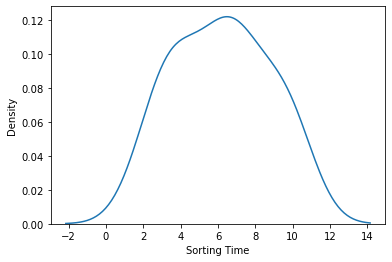

In [22]:
sns.distplot(a= delivery['Sorting Time'],hist= False)
plt.show()

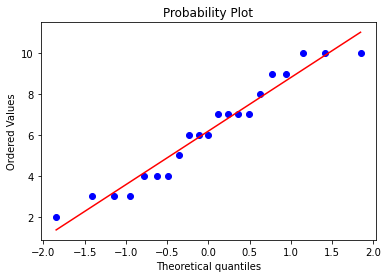

In [24]:
stats.probplot(x= delivery['Sorting Time'],dist= 'norm',plot= plt)
plt.show()

# Data Preparation

In [25]:
x = delivery['Sorting Time']
y = delivery['Delivery Time']

# Model Building |Model training

In [27]:
import statsmodels.formula.api as smf
model = smf.ols('y~x',data=delivery).fit()

In [28]:
model.params

Intercept    6.582734
x            1.649020
dtype: float64

In [35]:
model.summary() # R_sqr strength is 68% 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           3.98e-06
Time:                        23:57:31   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Testing

In [42]:
y_pred = model.predict(delivery)

In [38]:
error = model.resid_pearson

# Model Evaluation

## Homoscadascity Test

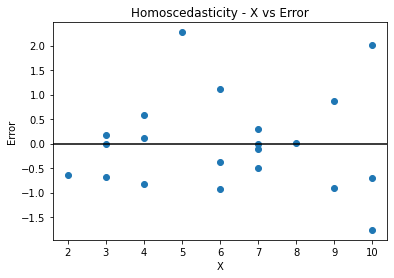

In [45]:
plt.scatter(x = x, y= error)
plt.axhline(0,color = 'black')
plt.title('Homoscedasticity - X vs Error')
plt.xlabel('X')
plt.ylabel('Error')
plt.show()

## Zero residual Mean

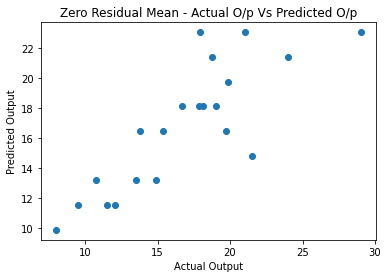

In [44]:
plt.scatter(x = y , y = y_pred)
plt.title('Zero Residual Mean - Actual O/p Vs Predicted O/p')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

# Model transformation

In [47]:
model2 =smf.ols('y~np.log(x)',data=delivery).fit()

In [48]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           2.64e-06
Time:                        00:06:30   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(x)      9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ============================================================

In [49]:
model3 = smf.ols('np.log(y)~x',data=delivery).fit()

In [50]:
model3.rsquared

0.7109478980584187

# ===========================================================

In [53]:
delivery['Sorting_Sqr'] = delivery['Sorting Time']*delivery['Sorting Time']
delivery

,Delivery Time,Sorting Time,Sorting Sqr,Sorting_Sqr
0,21.00,10,100,100
1,13.50,4,16,16
2,19.75,6,36,36
3,24.00,9,81,81
4,29.00,10,100,100
5,15.35,6,36,36
6,19.00,7,49,49
7,9.50,3,9,9
8,17.90,10,100,100
9,18.75,9,81,81


In [55]:
model4 = smf.ols('np.log(y)~x+Sorting_Sqr',data= delivery).fit()

In [56]:
model4.rsquared

0.764866634295373

In [58]:
y_pred4 = model4.predict(delivery)

In [59]:
y_pred5 = np.exp(y_pred4)

In [60]:
model4.resid

0    -0.030341
1     0.044747
2     0.150179
3     0.125141
4     0.292433
5    -0.101859
6     0.012471
7    -0.130613
8    -0.190063
9    -0.121719
10   -0.018085
11   -0.183037
12   -0.117758
13    0.060442
14    0.105499
15    0.142076
16   -0.211935
17   -0.035504
18   -0.100744
19   -0.051086
20    0.359754
dtype: float64

In [63]:
error5 = model4.resid_pearson

In [62]:
y_pred5

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

# Model Evaulation

### Homosacdascity

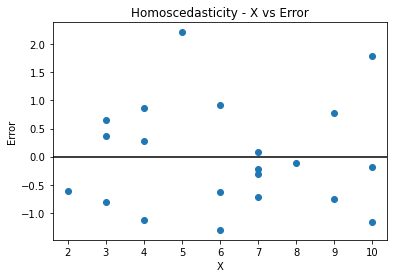

In [72]:
plt.scatter(x= x ,y = error5)
plt.axhline(0,color = 'black')
plt.title('Homoscedasticity - X vs Error')
plt.xlabel('X')
plt.ylabel('Error')
plt.show()

### Zero Residual mean

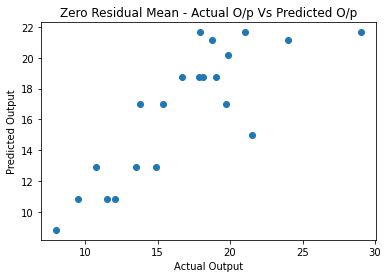

In [73]:
plt.scatter(x = y, y = y_pred5)
plt.title('Zero Residual Mean - Actual O/p Vs Predicted O/p')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

##  Fitted Line

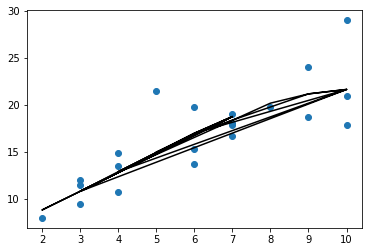

In [80]:
plt.scatter(x = x, y= y)
plt.plot(x,y_pred5,color = 'Black')
plt.show()

# model 4 is the best model